In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2022-03-30 10:28:14.398011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-30 10:28:14.398043: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
generator = keras.models.load_model('../datas/weights/label_conditioning/generatorcifar10.h5')

2022-03-30 10:28:16.586544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-30 10:28:16.586600: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 10:28:16.586642: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-03-30 10:28:16.586962: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


A tanítás paraméterei:
epochs = 50
batch_size = 128
latent_dim = 512
image_size = (32, 32)

In [3]:
latent_dim = 512

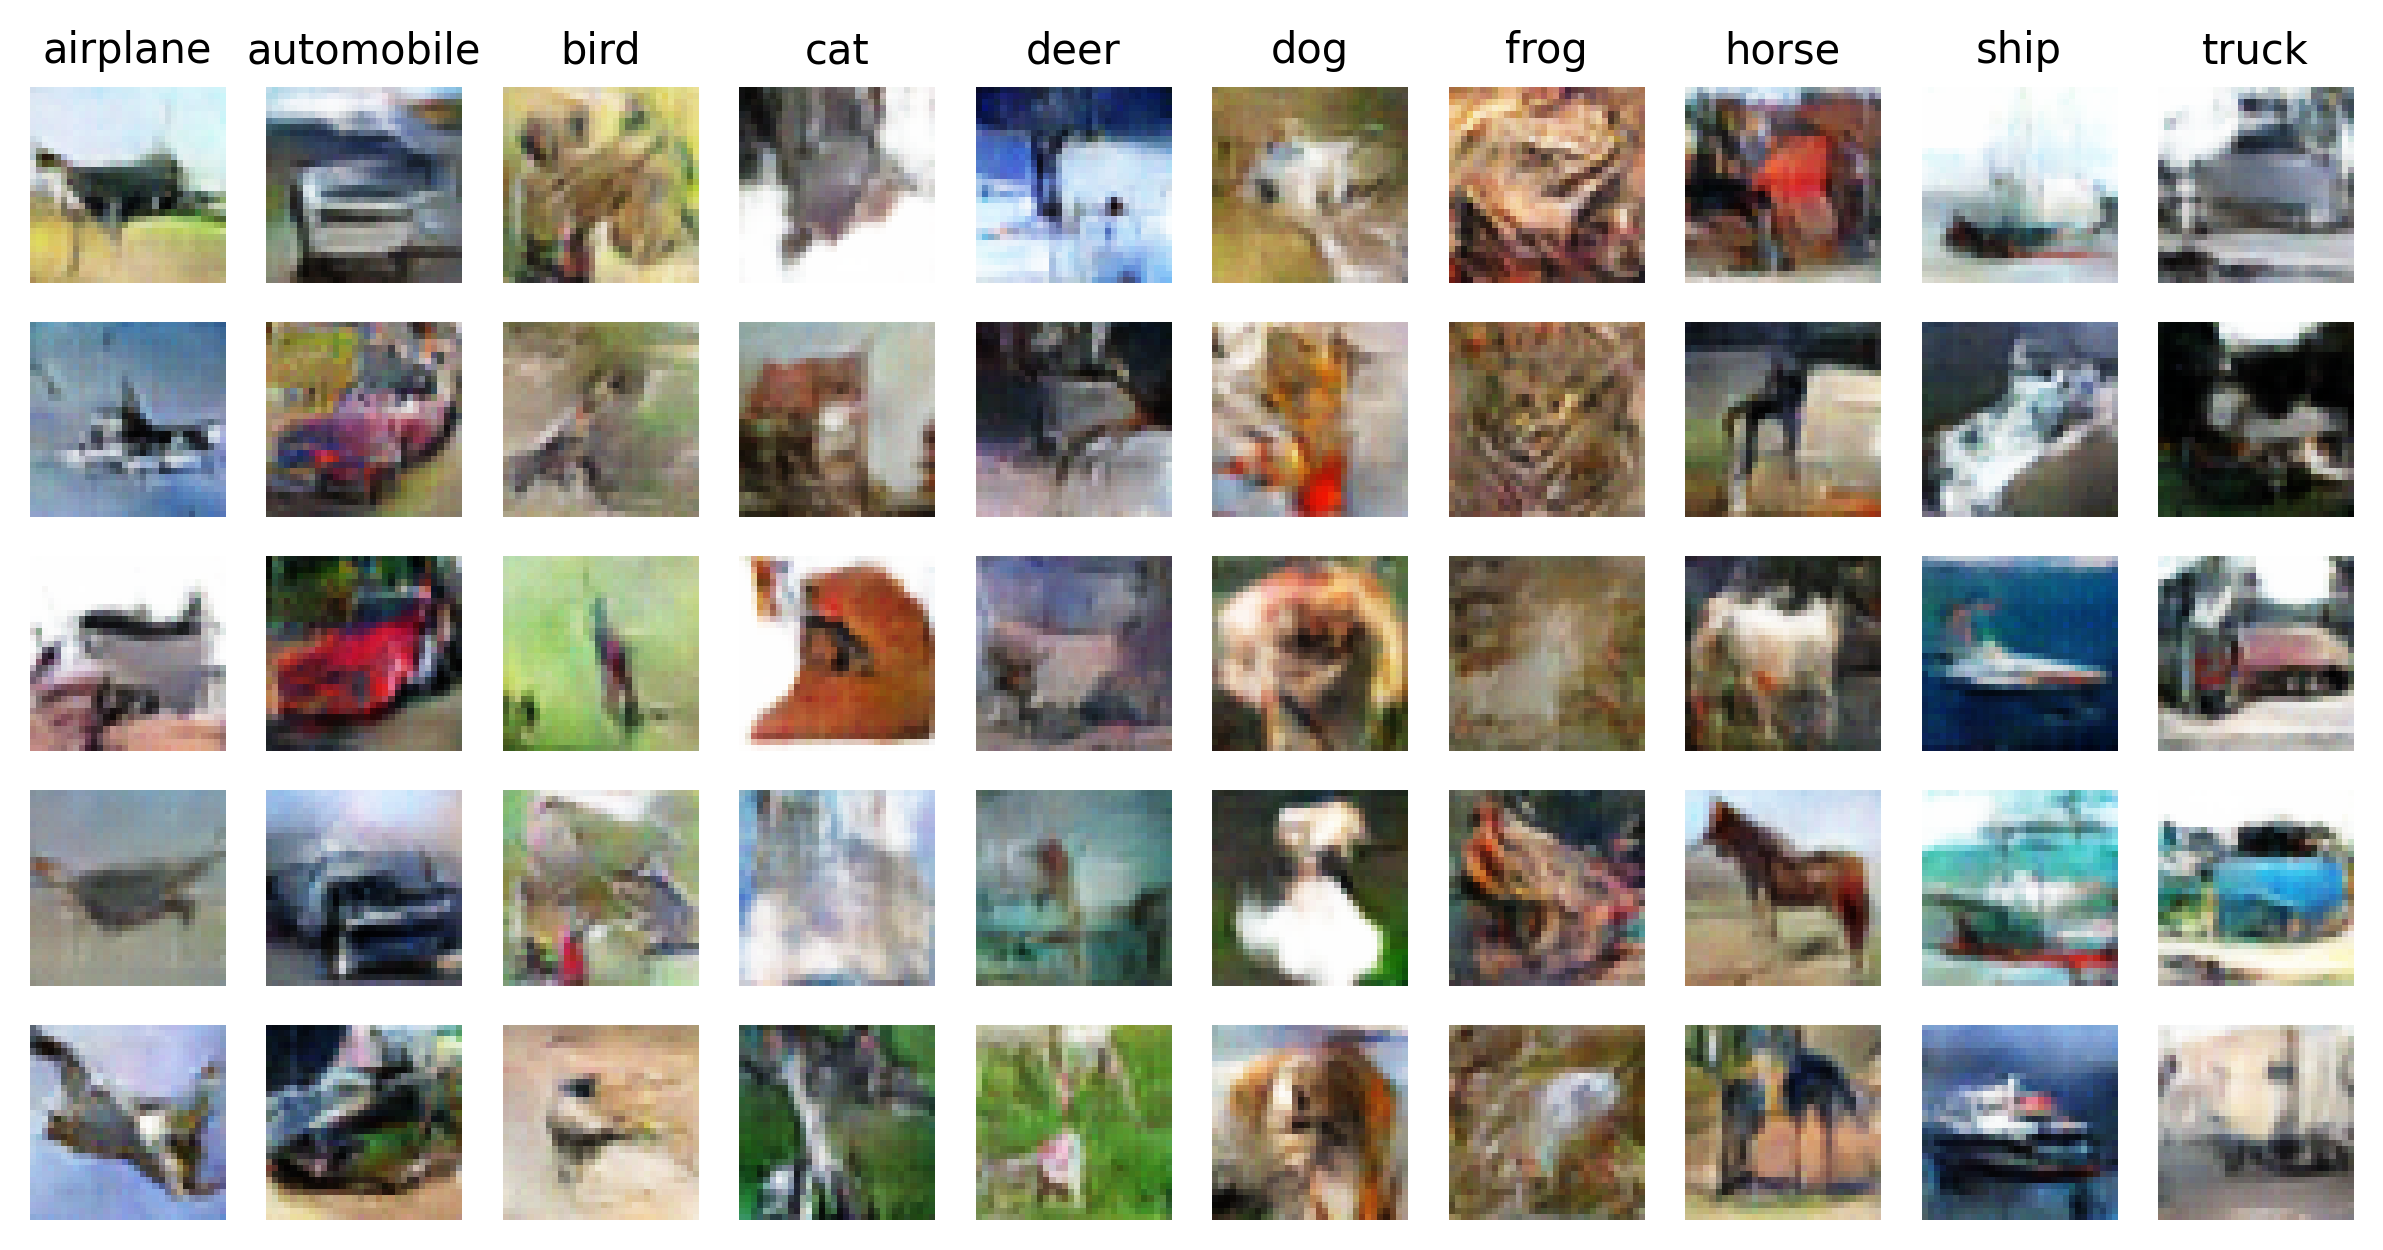

In [6]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
noises = tf.random.normal([5, latent_dim])

fig, axes = plt.subplots(figsize=(10, 5), nrows=5, ncols=10, dpi=300)
for i in range(len(class_names)):
    example_images = generator((noises, tf.constant(np.full(5, i))), training=False)
    for j in range(len(example_images)):
        if(j == 0):
            axes[j, i].set_title(class_names[i], fontdict={'fontsize': 10})
        axes[j, i].imshow((example_images[j].numpy() * 127.5 + 127.5).astype("uint32"), interpolation="none")
        axes[j, i].axis('off')
plt.show()

airplane


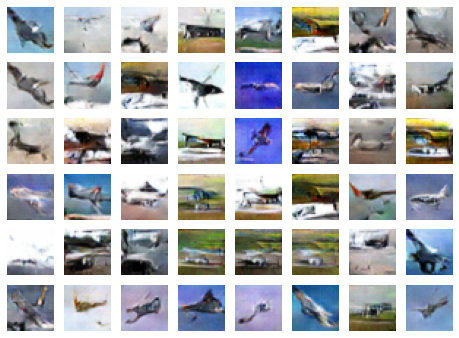

automobile


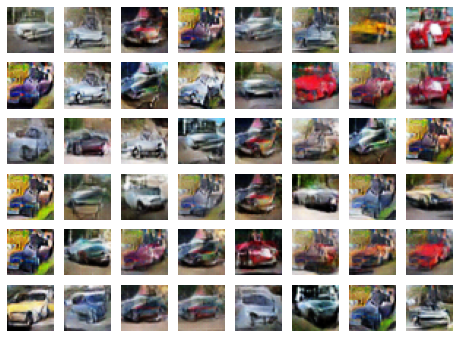

bird


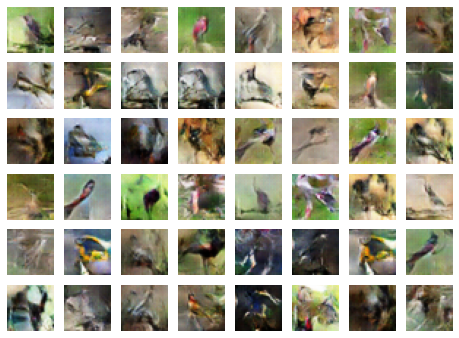

cat


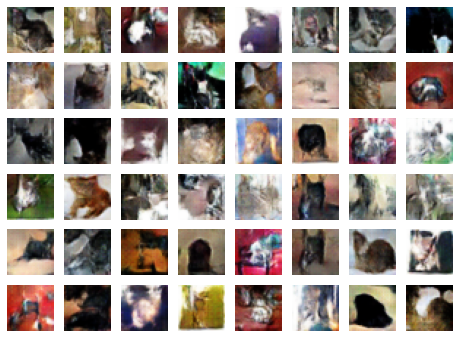

deer


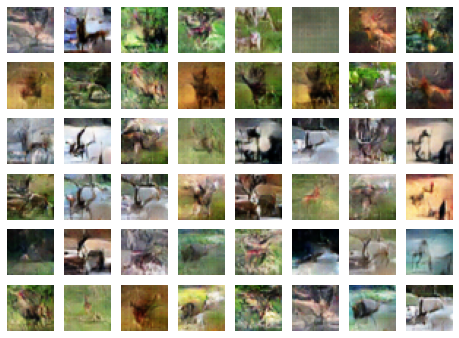

dog


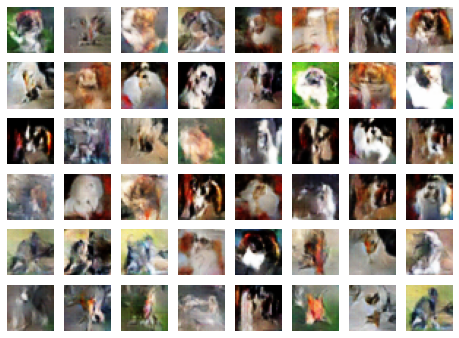

frog


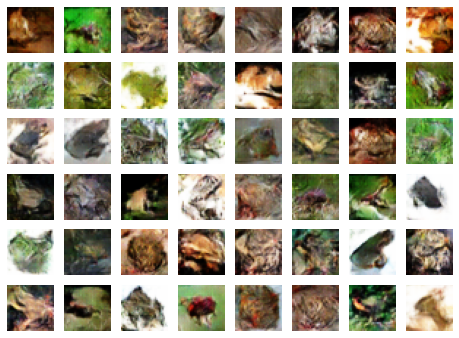

horse


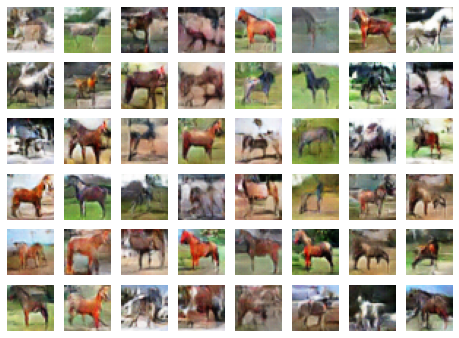

ship


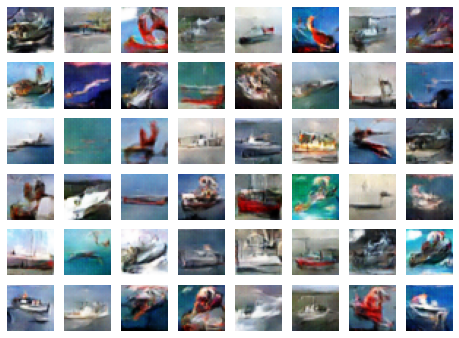

truck


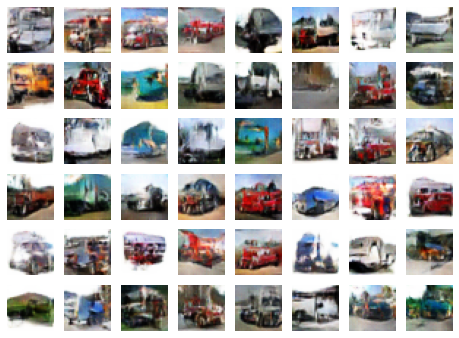

In [5]:
def plot_grid_of_images(images, epoch):
    plt.figure(figsize=(8, 8))

    for i in range(images.shape[0]):
        plt.subplot(8, 8, i+1)
        plt.imshow((images[i].numpy() * 127.5 + 127.5).astype("uint32"))
        plt.axis('off')

    plt.show()

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
noises = tf.random.normal([48, latent_dim])
for i in range(10):
    print(class_names[i])

    example_images = generator((noises, tf.constant(np.full(48, i))), training=False)
    plot_grid_of_images(example_images, 0)